# Part 1: Understanding Data/ Data Cleaning

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay


In [158]:
import warnings
warnings.filterwarnings('ignore')

In [159]:
df = pd.read_csv('data/Predict Hair Fall.csv')

In [160]:
df.head()


,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


In [161]:
df['Stress'].value_counts()

Stress
Moderate    351
Low         327
High        321
Name: count, dtype: int64

In [162]:
df['Medications & Treatments'].value_counts()

Medications & Treatments
Rogaine                      116
Antidepressants              110
Steroids                     107
Heart Medication             104
Accutane                     102
Antibiotics                   94
Antifungal Cream              94
Chemotherapy                  90
Blood Pressure Medication     90
Immunomodulators              90
No Data                        2
Name: count, dtype: int64

In [163]:
df['Medical Conditions'].value_counts()

Medical Conditions
No Data                  110
Alopecia Areata          107
Psoriasis                100
Thyroid Problems          99
Androgenetic Alopecia     98
Dermatitis                92
Dermatosis                88
Seborrheic Dermatitis     88
Scalp Infection           79
Eczema                    69
Ringworm                  69
Name: count, dtype: int64

In [164]:
df['Nutritional Deficiencies '].value_counts()

Nutritional Deficiencies 
Zinc Deficiency         108
Vitamin D Deficiency    104
Biotin Deficiency        99
Vitamin A Deficiency     99
Omega-3 fatty acids      92
Protein deficiency       90
Magnesium deficiency     84
Vitamin E deficiency     83
Selenium deficiency      82
No Data                  80
Iron deficiency          78
Name: count, dtype: int64

In [165]:
df.shape

(999, 13)

In [10]:
df.dtypes

Id                            int64
Genetics                     object
Hormonal Changes             object
Medical Conditions           object
Medications & Treatments     object
Nutritional Deficiencies     object
Stress                       object
Age                           int64
Poor Hair Care Habits        object
Environmental Factors        object
Smoking                      object
Weight Loss                  object
Hair Loss                     int64
dtype: object

In [169]:
df.to_csv('data/df-eda.csv', index = False)

In [170]:
df['Genetics'] = df['Genetics'].map({'Yes': 1, 'No': 0})

In [12]:
df['Hormonal Changes'] = df['Hormonal Changes'].map({'Yes': 1, 'No': 0})
df['Poor Hair Care Habits '] = df['Poor Hair Care Habits '].map({'Yes': 1, 'No': 0})
df['Environmental Factors'] = df['Environmental Factors'].map({'Yes': 1, 'No': 0})
df['Smoking'] = df['Smoking'].map({'Yes': 1, 'No': 0})
df['Weight Loss '] = df['Weight Loss '].map({'Yes': 1, 'No': 0})


In [13]:
df.dtypes

Id                            int64
Genetics                      int64
Hormonal Changes              int64
Medical Conditions           object
Medications & Treatments     object
Nutritional Deficiencies     object
Stress                       object
Age                           int64
Poor Hair Care Habits         int64
Environmental Factors         int64
Smoking                       int64
Weight Loss                   int64
Hair Loss                     int64
dtype: object

In [14]:
df.columns

Index(['Id', 'Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies ', 'Stress',
       'Age', 'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking',
       'Weight Loss ', 'Hair Loss'],
      dtype='object')

In [15]:
df.describe()

,Id,Genetics,Hormonal Changes,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
count,999.000000,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,153354.673674,0.522523,0.50951,34.188188,0.492492,0.508509,0.519520,0.472472,0.497497
std,25516.041985,0.499743,0.50016,9.377980,0.500194,0.500178,0.499869,0.499492,0.500244
min,110003.000000,0.000000,0.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,131867.500000,0.000000,0.00000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,152951.000000,1.000000,1.00000,34.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,174969.000000,1.000000,1.00000,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,199949.000000,1.000000,1.00000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df.isnull().sum()

Id                           0
Genetics                     0
Hormonal Changes             0
Medical Conditions           0
Medications & Treatments     0
Nutritional Deficiencies     0
Stress                       0
Age                          0
Poor Hair Care Habits        0
Environmental Factors        0
Smoking                      0
Weight Loss                  0
Hair Loss                    0
dtype: int64

In [63]:
df.to_csv('data/df1.csv', index = False)

# Part 2: Exploratory Data Analysis/ Visualizations

In [171]:
df_eda = pd.read_csv('data/df-eda.csv')

In [172]:
df_eda.dtypes

Id                            int64
Genetics                     object
Hormonal Changes             object
Medical Conditions           object
Medications & Treatments     object
Nutritional Deficiencies     object
Stress                       object
Age                           int64
Poor Hair Care Habits        object
Environmental Factors        object
Smoking                      object
Weight Loss                  object
Hair Loss                     int64
dtype: object

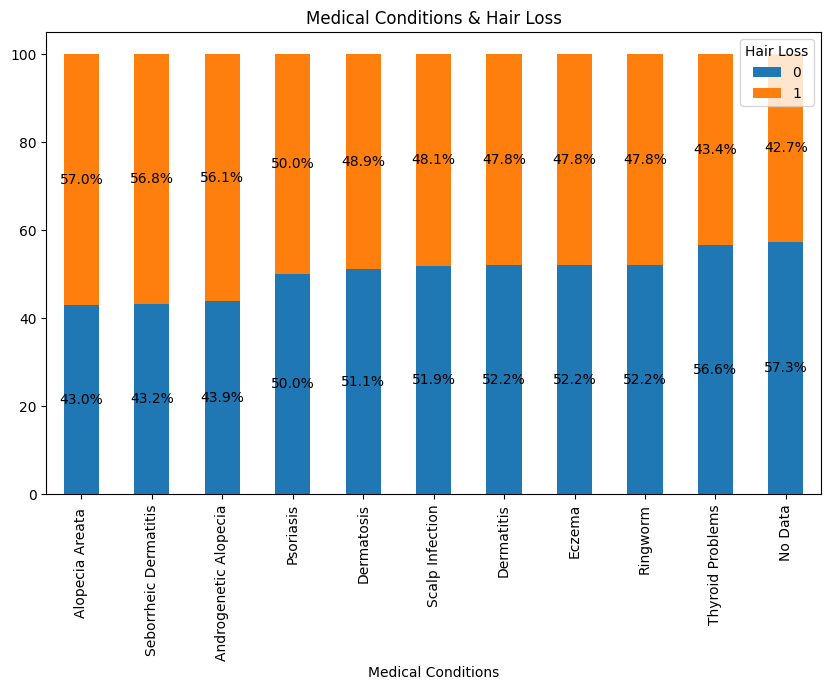

In [231]:
grouped = df.groupby(['Medical Conditions', 'Hair Loss']).size().unstack()
grouped = grouped.div(grouped.sum(axis=1), axis=0) * 100

max_percent_hair_loss = grouped[1].groupby('Medical Conditions').max()

sorted_medical_conditions = max_percent_hair_loss.sort_values(ascending=False).index

grouped_sorted = grouped.loc[sorted_medical_conditions]

ax = grouped_sorted.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')
plt.title('Medical Conditions & Hair Loss')
plt.savefig('submissions/medconditions.png');

> Using the information from the individuals in our dataset, 57% of individuals with Alopecia Areata experience hair loss, 56.8% of those with Seborrheic Dermatitis experince hair loss, and 56.1% of those with Androgenetic Alopecia experience hair loss.
>While 57.3% of those with no medical conditions do not experience hair loss. 

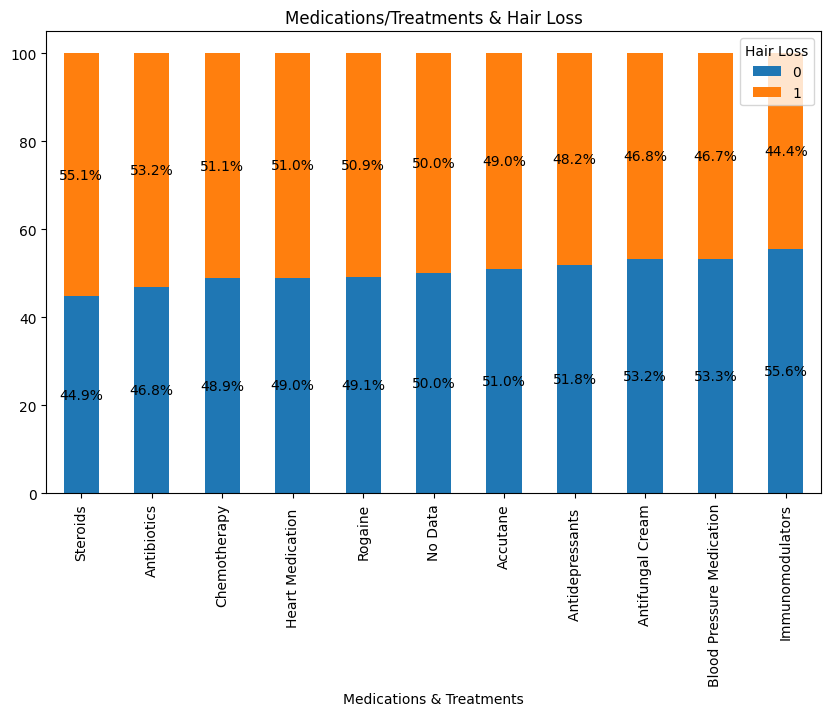

In [216]:
grouped = df.groupby(['Medications & Treatments', 'Hair Loss']).size().unstack()
grouped = grouped.div(grouped.sum(axis=1), axis=0) * 100

max_percent_hair_loss = grouped[1].groupby('Medications & Treatments').max()

sorted_medical_conditions = max_percent_hair_loss.sort_values(ascending=False).index

grouped_sorted = grouped.loc[sorted_medical_conditions]

ax = grouped_sorted.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')
plt.title('Medications/Treatments & Hair Loss')
plt.savefig('submissions/medic_treatmnts.png');

The majority of individuals taking medications/treaments such as Steroids, Antibiotics, Chemotherapy, and Heart Medication experience hair loss while the majority of individuals taking Immunomodulators, Blood Pressure Medication, and Antifungal Creams experience no hair loss. Those who are not on any medications/treatments ('No Data') have an even 50/50 split of experiencing hair loss or not.

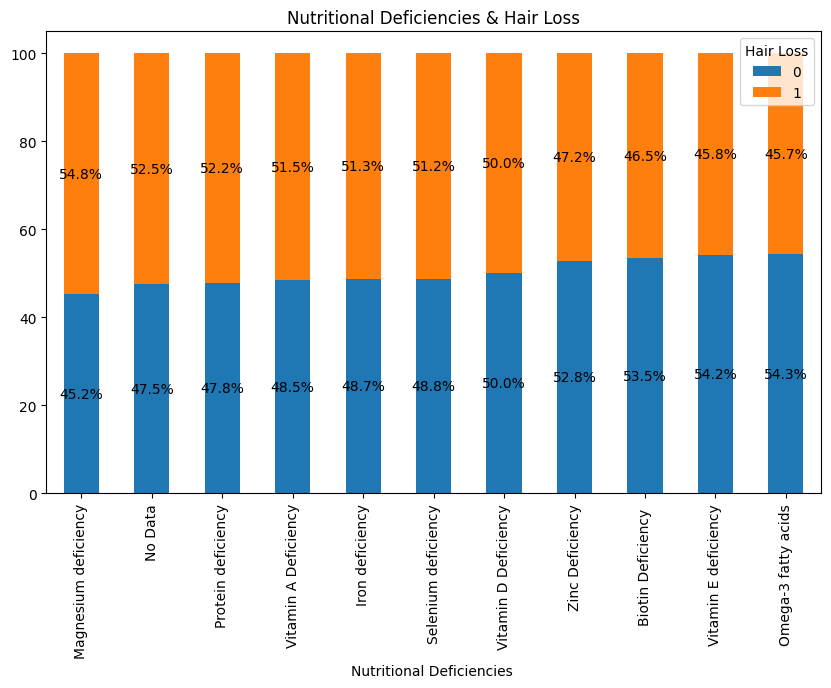

In [217]:
grouped = df.groupby(['Nutritional Deficiencies ', 'Hair Loss']).size().unstack()
grouped = grouped.div(grouped.sum(axis=1), axis=0) * 100

max_percent_hair_loss = grouped[1].groupby('Nutritional Deficiencies ').max()

sorted_medical_conditions = max_percent_hair_loss.sort_values(ascending=False).index

grouped_sorted = grouped.loc[sorted_medical_conditions]

ax = grouped_sorted.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')
plt.title('Nutritional Deficiencies & Hair Loss')
plt.savefig('submissions/nutrition_def.png');

> 54.8% of those with a magnesium defficiency experience hair loss, 52.5% of those with no deficiency also experince hair loss, 52.2% of those with protein deficiency experience hair loss compared to those who are deficient in omega-3 fatty acid, vitamin E, and Biotin.

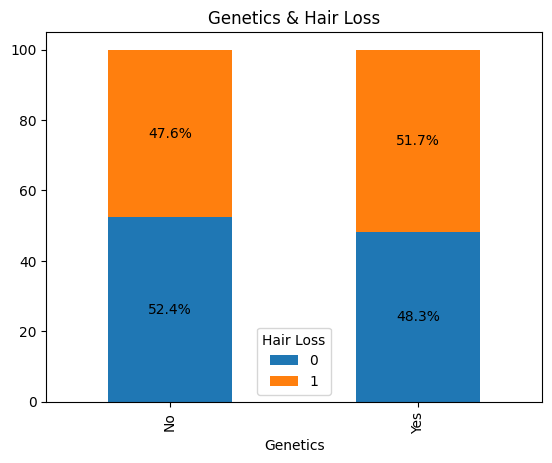

In [220]:
grouped = df_eda.groupby(['Genetics', 'Hair Loss']).size().unstack()
grouped = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = grouped.plot(kind='bar', stacked=True)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')
plt.title('Genetics & Hair Loss')
plt.savefig('submissions/genetics.png');
    

In this visualization, 51.7% of individuals with a family history of baldness also end up experiencing hair loss whereas only 47.6% of those individuals who do not have a family history of baldness experience hair loss. This shows a slight positive correlation of how genetics play a role in hair loss.

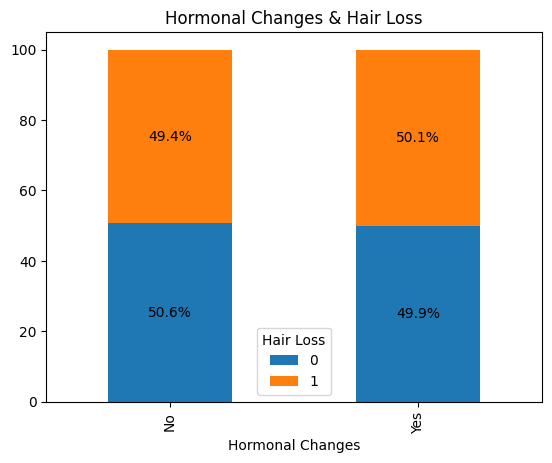

In [221]:
grouped = df_eda.groupby(['Hormonal Changes', 'Hair Loss']).size().unstack()
grouped = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = grouped.plot(kind='bar', stacked=True)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')
plt.title('Hormonal Changes & Hair Loss')
plt.savefig('submissions/hormonalchanges.png');

> In this visualization, 50.1% of individuals experiencing hormonal changes also experience hair loss while 49.4% of those who do not experience hormonal changes also experience hair loss. This visualization is interesting as there is not a strong correlation between hormonal changes and hair loss. 

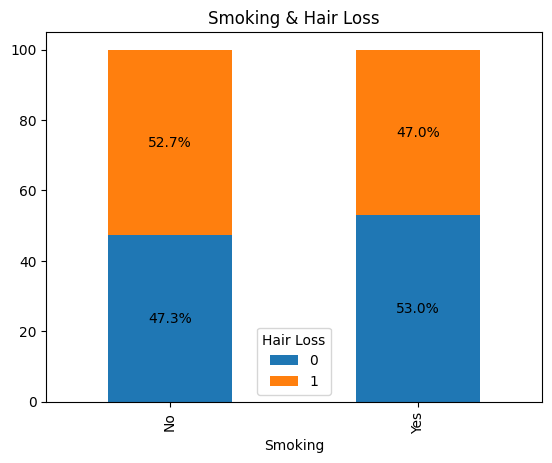

In [222]:
grouped = df_eda.groupby(['Smoking', 'Hair Loss']).size().unstack()
grouped = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = grouped.plot(kind='bar', stacked=True)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')
plt.title('Smoking & Hair Loss')
plt.savefig('submissions/smoking.png');

47% of individuals in the dataset who are smokers experience hair loss while 52.7% of those who do not smoke experience hair loss. This visualization reveals that there is not a strong correlation between smoking and hair loss among the data collected in our dataset.

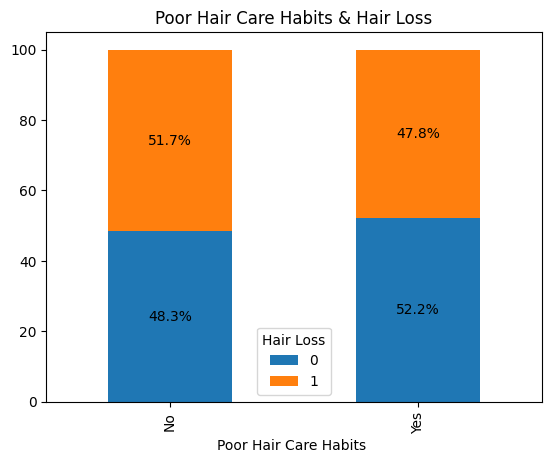

In [232]:
grouped = df_eda.groupby(['Poor Hair Care Habits ', 'Hair Loss']).size().unstack()
grouped = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = grouped.plot(kind='bar', stacked=True)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')
plt.title('Poor Hair Care Habits & Hair Loss')
plt.savefig('submissions/poorhairhabits.png');

In this visualization, there appears to be only 47.8% of individuals with poor hair care habits experiencing hair loss while 51.7% of those who do not have poor hair care habits actually experience hair loss. 

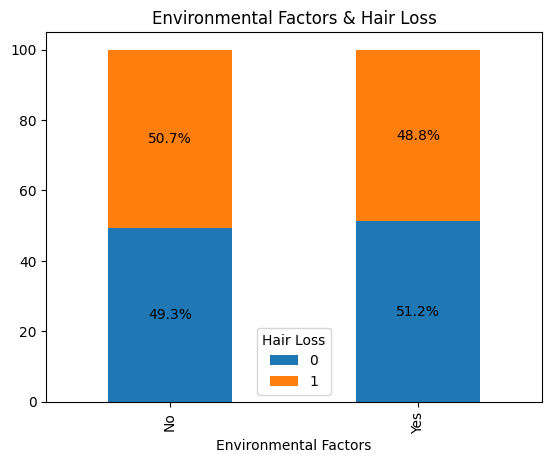

In [223]:
grouped = df_eda.groupby(['Environmental Factors', 'Hair Loss']).size().unstack()
grouped = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = grouped.plot(kind='bar', stacked=True)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')
plt.title('Environmental Factors & Hair Loss')
plt.savefig('submissions/envirofactors.png');

This visualization reveals that only 48.8% of individuals who are exposed to environmental factors that might impact hair loss actually do experience hair loss while 50.7% of those individuals who are not exposed to those environmental factors are experiencing hair loss. 

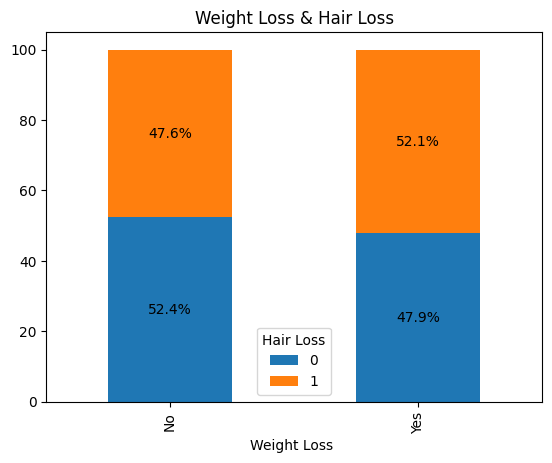

In [224]:
grouped = df_eda.groupby(['Weight Loss ', 'Hair Loss']).size().unstack()
grouped = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = grouped.plot(kind='bar', stacked=True)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')
plt.title('Weight Loss & Hair Loss')
plt.savefig('submissions/weightloss.png');

This visualization shows that the majority (52.1%) of those who experience weight loss also experience hair loss. while the majority of those who do not experience weight loss (52.4%) also do not experience hair loss. 

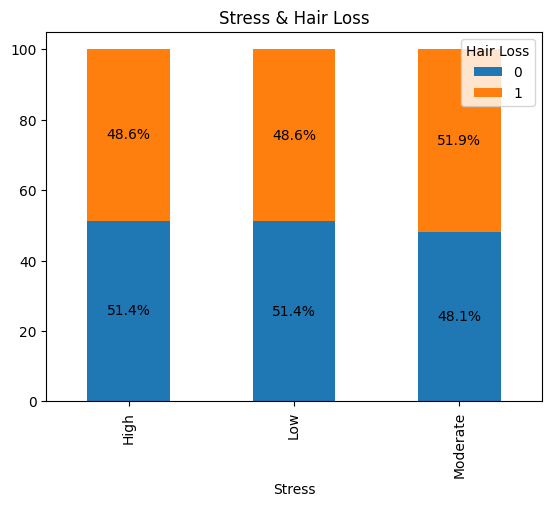

In [230]:
grouped = df_eda.groupby(['Stress', 'Hair Loss']).size().unstack()
grouped = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = grouped.plot(kind='bar', stacked=True)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')
plt.title('Stress & Hair Loss')
plt.savefig('submissions/stress.png');

> This visualiztion is interesting because you would assume that those individuals experincing high levels of stress would experience more hair loss, howeer from the data in our dataset it appears that only 48.6% of those experiencing high levels of stress and low levels of stress experience hair loss while 51.9% of individuals with moderate levels of stress experience hair loss. 

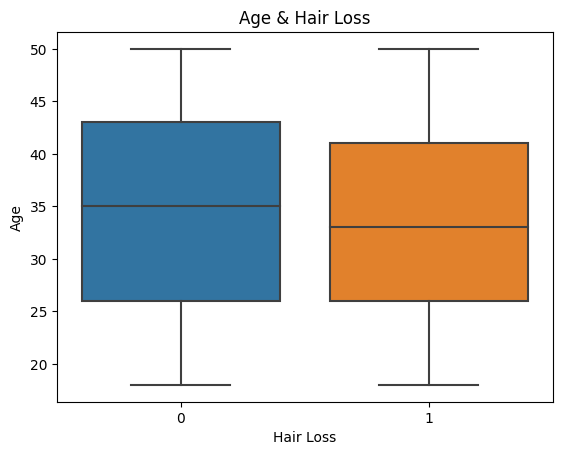

In [225]:
sns.boxplot(data = df_eda,
             y = 'Age',
             x = 'Hair Loss'
            )
plt.title('Age & Hair Loss')
plt.savefig('submissions/age.png');

>Those with no presence of hair loss have a higher age on average than those individuals in the dataset who did experience hair loss. You can also visualize with the orange line the presence of hair loss among individuals by age and it reveals that the majority of individuals in the dataset experiencing hair loss are around 27-37 years old.

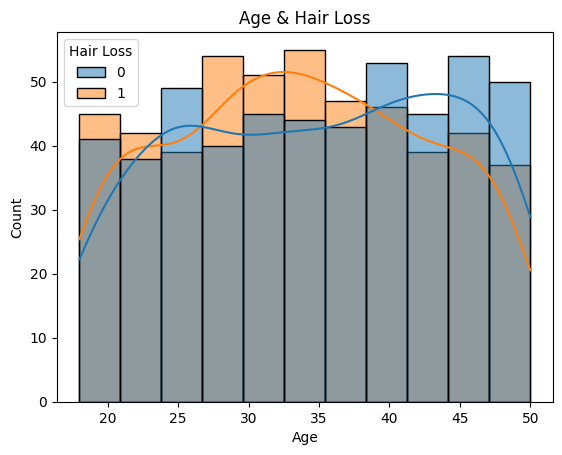

In [226]:
sns.histplot(data = df_eda,
             x = 'Age',
             hue = 'Hair Loss',
            kde = True)
plt.title('Age & Hair Loss')
plt.savefig('submissions/age2.png');

Distribution of age (orange) for those who experience hair loss and those who do not experiene hair loss (blue).

In [209]:
df_dummy = pd.get_dummies(df, dtype = int)

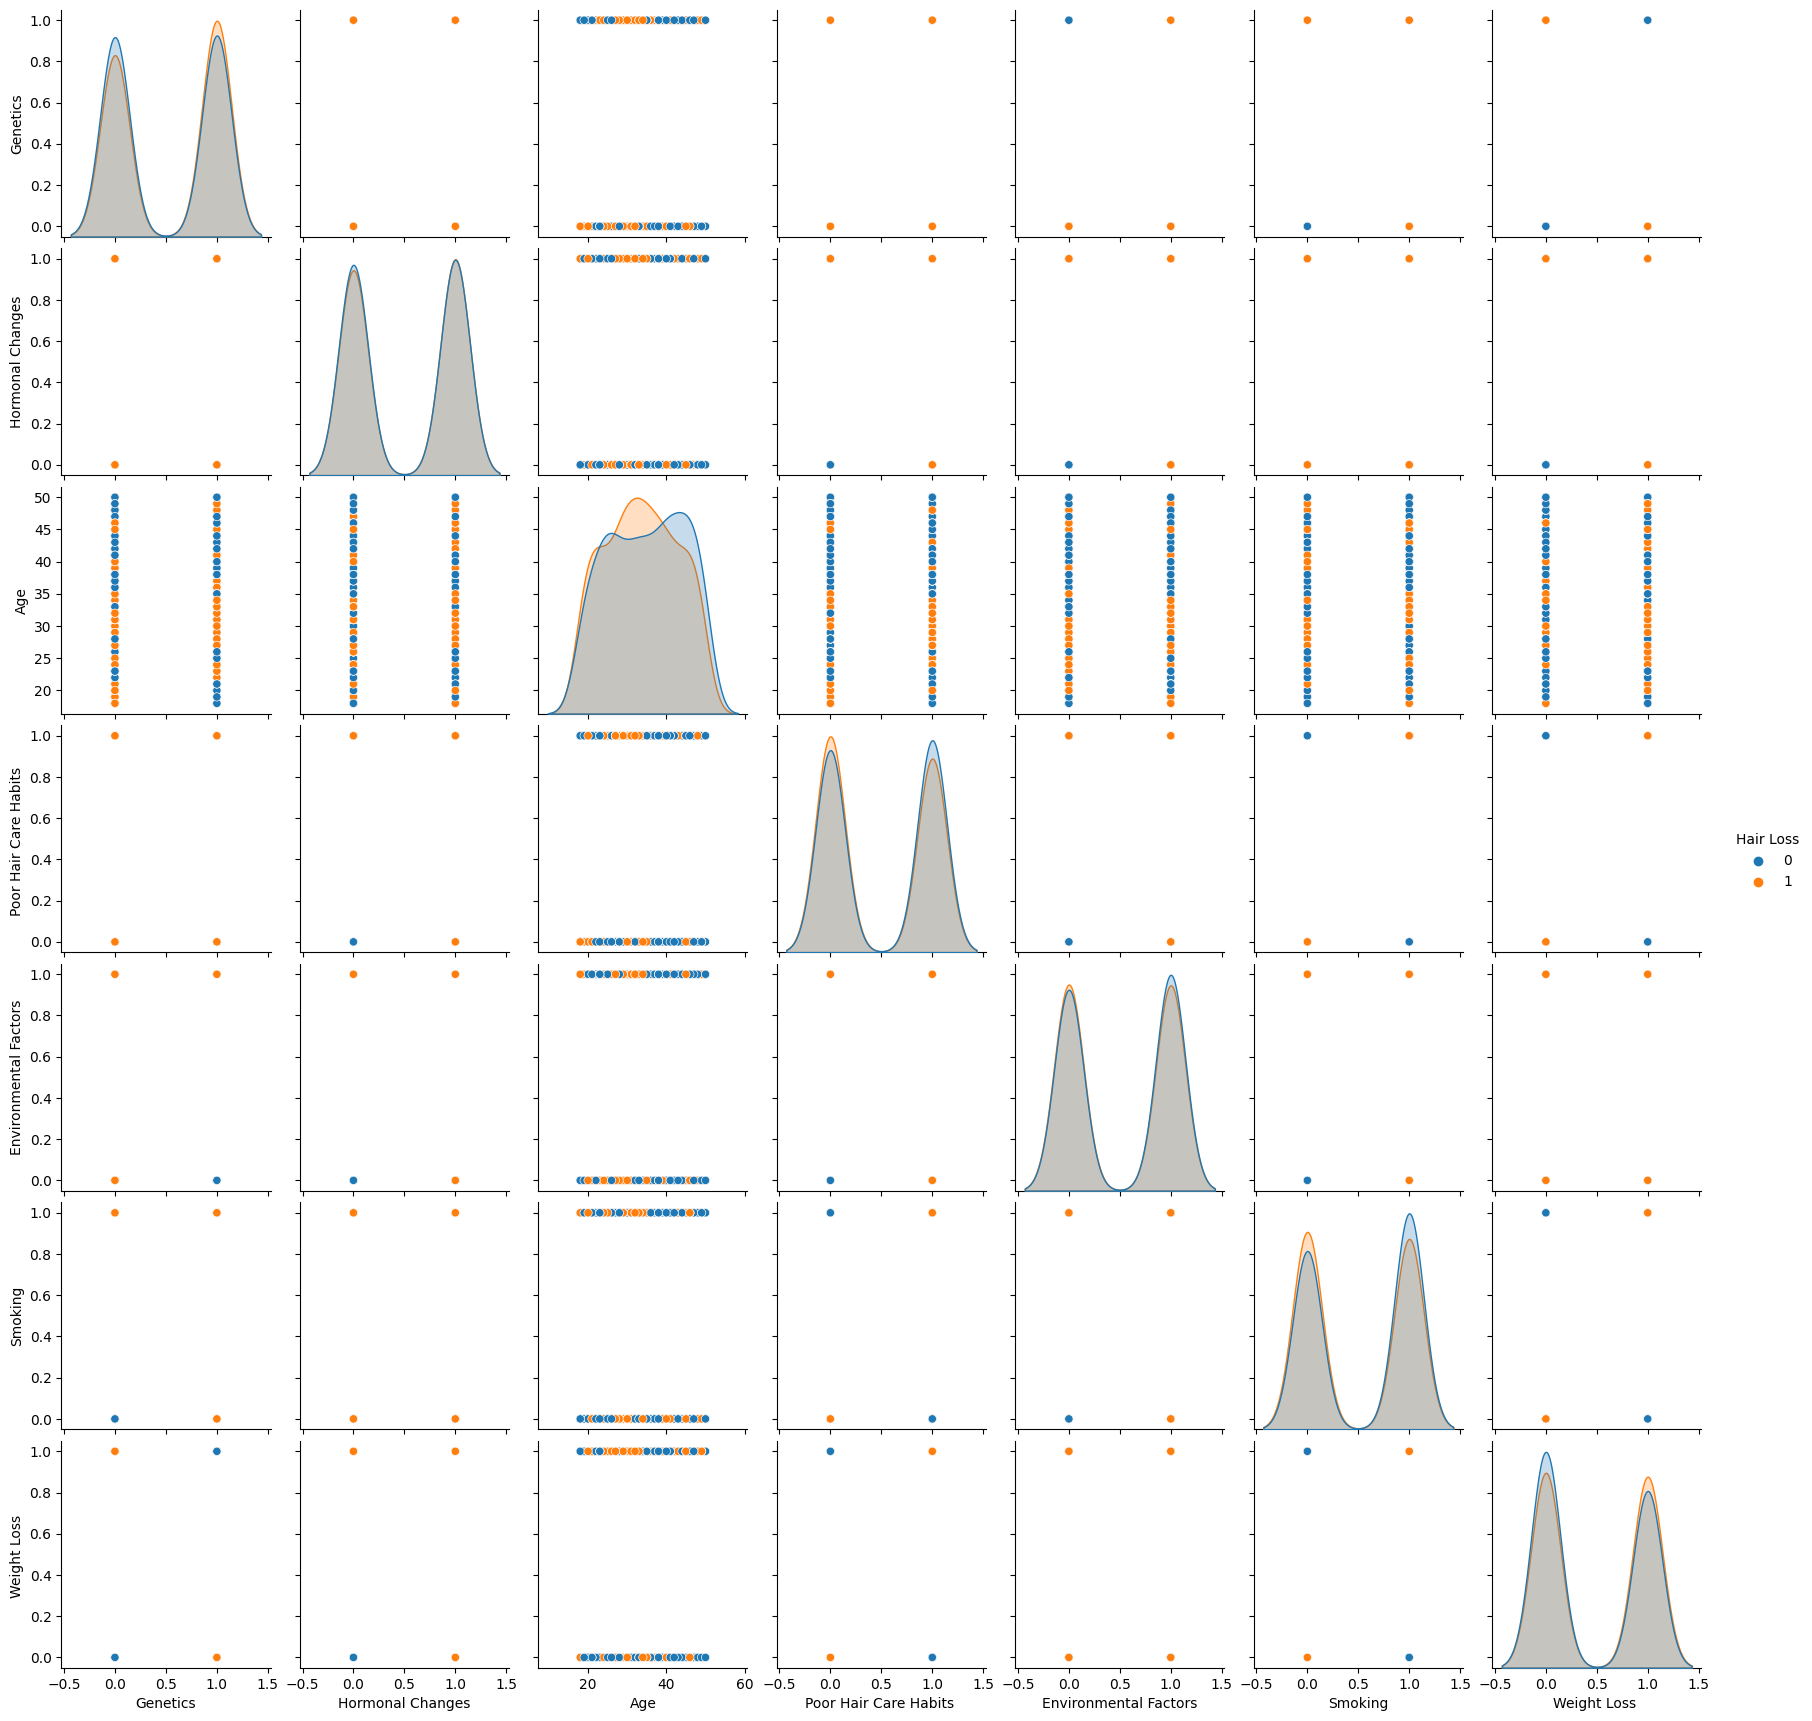

In [65]:
sns.pairplot(data = df,
             x_vars = ['Gebnetics', 'Hormonal Changes', 'Age','Poor Hair Care Habits ',
                        'Environmental Factors', 'Smoking', 'Weight Loss '],
            y_vars = ['Genetics', 'Hormonal Changes', 'Age','Poor Hair Care Habits ',
                        'Environmental Factors', 'Smoking', 'Weight Loss '],
             hue = 'Hair Loss'
);

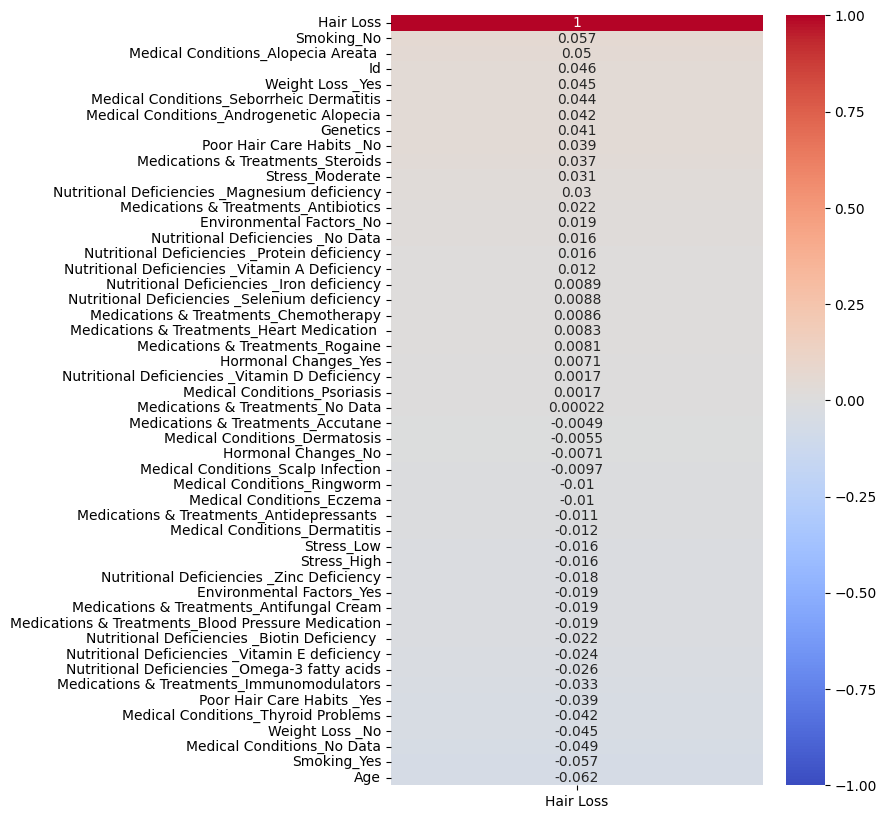

In [210]:
plt.figure(figsize = (6, 10))
sns.heatmap(df_dummy.corr(numeric_only = True)[['Hair Loss']].sort_values(by = 'Hair Loss', ascending = False),
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm');

# Part 3: Modeling:

In [122]:
df['Hair Loss'].value_counts(normalize = True)

Hair Loss
0    0.502503
1    0.497497
Name: proportion, dtype: float64

> Baseline model is 50.25% Our model should perform better than 50.25% at detecting hair loss.

In [123]:
    features = ['Genetics', 'Hormonal Changes', 'Age','Poor Hair Care Habits ', 'Environmental Factors', 'Smoking', 'Weight Loss ']
    X = df[features]
    y = df['Hair Loss']
    

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [125]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [126]:
knn = KNeighborsClassifier()

In [127]:
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [211]:
knn.score(X_train_sc, y_train)

0.6328437917222964

In [212]:
knn.score(X_test_sc, y_test)

0.576

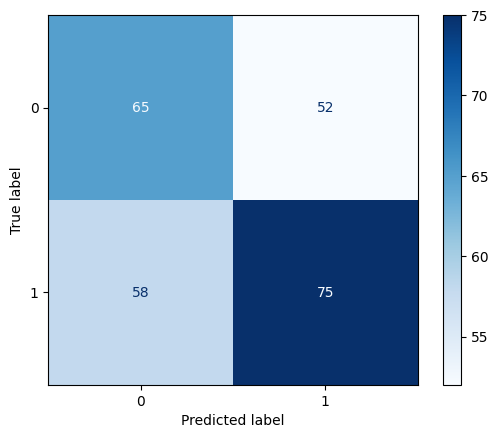

In [130]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap = 'Blues');

In [131]:
scores = []

for k in range(1,32, 2):
    knn = KNeighborsClassifier(n_neighbors = k, n_jobs = -1) 
    knn.fit(X_train_sc, y_train)
    acc_train = knn.score(X_train_sc, y_train)
    acc_test = knn.score(X_test_sc, y_test)
    scores.append({'k' : k, 'Training Accuracy' :acc_train, 'Test Accuracy' : acc_test})

In [132]:
df_score = pd.DataFrame(scores)
df_score

,k,Training Accuracy,Test Accuracy
0,1,0.941255,0.540
1,3,0.771696,0.552
2,5,0.719626,0.560
3,7,0.660881,0.528
4,9,0.632844,0.576
5,11,0.623498,0.564
6,13,0.630174,0.548
7,15,0.608812,0.556
8,17,0.600801,0.528
9,19,0.596796,0.516


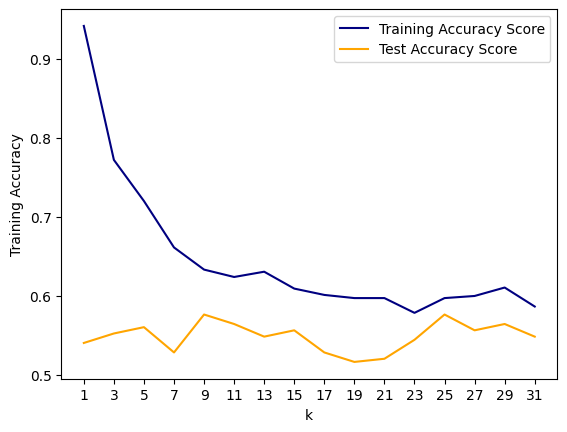

In [133]:
sns.lineplot(data = df_score,
             x = 'k',
             y = 'Training Accuracy',
             c = 'navy',
             label = 'Training Accuracy Score') 

sns.lineplot(data = df_score,
             x = 'k',
             y = 'Test Accuracy',
             c = 'orange',
label = 'Test Accuracy Score')
plt.xticks(range(1,32,2));

In [134]:
# Instantiate (again) & Refit (again)
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train_sc, y_train)


KNeighborsClassifier(n_neighbors=9)

In [135]:
# New training score
knn.score(X_train_sc, y_train)

0.6328437917222964

In [136]:
# New testing score
knn.score(X_test_sc, y_test)

0.576

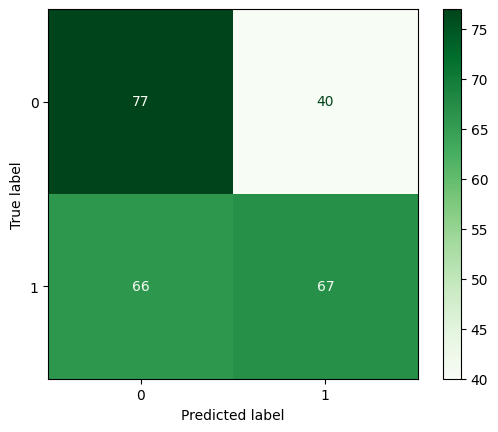

In [137]:
# New Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap = 'Greens');

In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
logr = LogisticRegression()
logr.fit(X_train_sc, y_train)

LogisticRegression()

In [140]:
logr.score(X_train_sc, y_train)

0.5380507343124166

In [141]:
logr.score(X_test_sc, y_test)

0.512

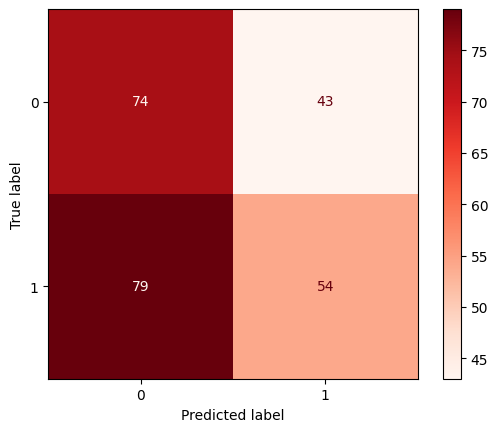

In [142]:
ConfusionMatrixDisplay.from_estimator(logr, X_test_sc, y_test, cmap = 'Reds');

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
rf = RandomForestClassifier()
rf.fit(X_train_sc, y_train)

RandomForestClassifier()

In [145]:
rf.score(X_train_sc, y_train)

0.9425901201602136

In [146]:
rf.score(X_test_sc, y_test)

0.54

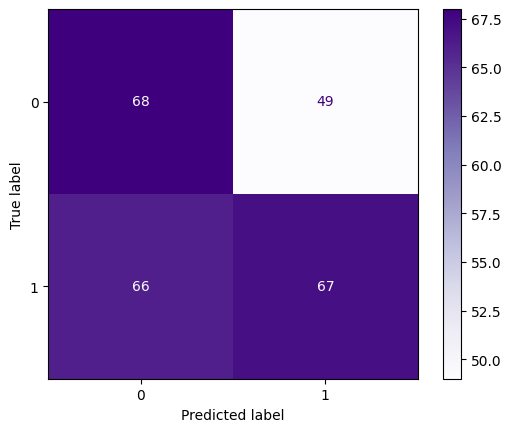

In [147]:
ConfusionMatrixDisplay.from_estimator(rf, X_test_sc, y_test, cmap = 'Purples');